<a href="https://colab.research.google.com/github/Al3jandraMtz/Proyecto4_DataLab/blob/main/P4_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Paso 1: Crear la columna 'high_rating' como variable binaria
high_rating_threshold = 4  # Umbral para una calificación alta
df['high_rating'] = (df['adjusted_rating'] >= high_rating_threshold).astype(int)

# Paso 2: Definir las variables para la regresión logística
X = df['positive_word_count']  # Variable independiente
y = df['high_rating']  # Variable dependiente (binaria)

# Agregar una constante para la regresión
X = sm.add_constant(X)

# Paso 3: Crear y ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Mostrar el resumen de la regresión logística
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.548397
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            high_rating   No. Observations:                 1351
Model:                          Logit   Df Residuals:                     1349
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                 0.02932
Time:                        18:39:12   Log-Likelihood:                -740.88
converged:                       True   LL-Null:                       -763.26
Covariance Type:            nonrobust   LLR p-value:                 2.228e-11
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1792      0.150      1.195      0.232      -0.115       0.473
po

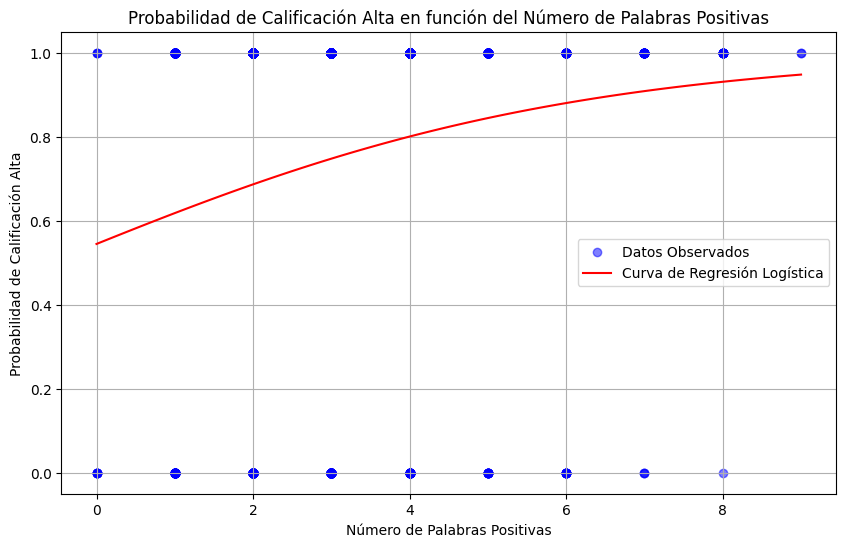

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Obtener las probabilidades predichas
# Generar un rango de valores para la variable independiente (número de palabras positivas)
X_pred = np.linspace(df['positive_word_count'].min(), df['positive_word_count'].max(), 100)
X_pred_const = sm.add_constant(X_pred)  # Añadir la constante para el modelo

# Calcular las probabilidades predichas usando el modelo ajustado
y_pred = result.predict(X_pred_const)

# Paso 2: Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(df['positive_word_count'], df['high_rating'], color='blue', alpha=0.5, label='Datos Observados')
plt.plot(X_pred, y_pred, color='red', label='Curva de Regresión Logística')

# Añadir títulos y etiquetas
plt.title('Probabilidad de Calificación Alta en función del Número de Palabras Positivas')
plt.xlabel('Número de Palabras Positivas')
plt.ylabel('Probabilidad de Calificación Alta')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()
